
# Project: No show appoinments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
here we have a dataset about peaoplos no show in this appoinetment with there doctor 



<html><h1> questions we will answer today ?</h1>
<p><B>(Q1)what is the most no-show about the ill?   </b></p>
<p><B>(Q2)what is the most no show age?             </b></p>
<p><B>(Q3) no-show about sms recived?         </b></p>
<p><B>(Q4)men or women better on attendance ? </b></p>

</html>  


In [2]:
# import lib..s
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# load my Data as df 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


need to know types and shapes 

In [4]:
# dtypes, shapes  to examine the entire data 

df.dtypes , "df shape is" , df.shape
      

(PatientId         float64
 AppointmentID       int64
 Gender             object
 ScheduledDay       object
 AppointmentDay     object
 Age                 int64
 Neighbourhood      object
 Scholarship         int64
 Hipertension        int64
 Diabetes            int64
 Alcoholism          int64
 Handcap             int64
 SMS_received        int64
 No-show            object
 dtype: object,
 'df shape is',
 (110527, 14))

More info about my DF to see if i can get some questions from there

In [5]:
# info to examine the entire data
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# describe to examine the entire data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning 


here i rename the columns name to become easy to type

In [7]:
# just lower all the columns names 

df = df.rename(columns={'PatientId' : 'patientid','AppointmentID':'appointmentid', 'Gender': 'gender',
                    'ScheduledDay': 'scheduledday', 'AppointmentDay' : 'appointmentday', 'Age' : 'age',
                    'Neighbourhood' : 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension' : 'hipertension', 
                    'Diabetes' : 'diabetes', 'Alcoholism' : 'alcoholism', 'Handcap' : 'handcap', 'SMS_received' : 'sms_received',
                    'No-show' : 'no_show'
                    })
df.head(2)                    

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


change types of some data 

In [8]:
# First i  do function to Don't repeat same code for change type 
def change_type(column_name, column_type) : 
    df[column_name] = df[column_name].astype(column_type)

In [9]:
# change some type of data 
change_type('age', int)
change_type('no_show', str)
change_type('sms_received', str)
change_type('gender', str)
df.dtypes


patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int32
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received       object
no_show            object
dtype: object

In [10]:
# turning scheduald day to date time
df['scheduledday'] = pd.to_datetime(df['scheduledday'])


check duplicates

In [11]:
df.duplicated().sum()

0

make elments in some columns easy to read

In [12]:
# first i will make function for changing elements
def change_element(colmn_name, old, new)  :
    df[colmn_name] = df[colmn_name].replace([old], new)


In [13]:
# change no/yes elements in no_show column
change_element('no_show', 'No', 'came')
change_element('no_show', 'Yes',"didn't_came" )
df['no_show'].value_counts()

came           88208
didn't_came    22319
Name: no_show, dtype: int64

In [14]:
# change 0/1 elements in sms_received column
change_element('sms_received', '0', "didn't recieive sms")
change_element('sms_received', '1', 'received sms')
df['sms_received'].value_counts()

didn't recieive sms    75045
received sms           35482
Name: sms_received, dtype: int64

## check the Weared ages like 0, -1 
0 age isn't weard cause the top of them attend the appointment , 
they are little babies 


In [15]:
# I will make a function to don't Repeat groupby
def groupby(column1, column2) : 
   return df.groupby([column1])[column2]

delete columns we didn't need

In [16]:
df.drop(['neighbourhood','scholarship', 'appointmentday' ], axis = 1 , inplace=True)
df.head(2)


,patientid,appointmentid,gender,scheduledday,age,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,62,1,0,0,0,didn't recieive sms,came
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,didn't recieive sms,came



features from scheduledday

In [17]:
# getting hour from scheduledday
df['scheduled_hour'] = pd.to_datetime(df['scheduledday']).dt.hour
df['scheduled_day'] = pd.to_datetime(df['scheduledday']).dt.day
df.head(2)

,patientid,appointmentid,gender,scheduledday,age,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_hour,scheduled_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,62,1,0,0,0,didn't recieive sms,came,18,29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,didn't recieive sms,came,16,29



New feture from Age

In [18]:
# here we make the age 4 categories
df.loc[(df.age <= 15),  'AgeGroup'] = 'Child'
df.loc[(df.age > 15 ) & (df.age <= 24),  'AgeGroup'] = 'Youth'
df.loc[(df.age >= 25 ) & (df.age <= 64),   'AgeGroup'] = 'Adult'
df.loc[(df.age >= 65 ),  'AgeGroup'] = 'Senior'

df.head()


,patientid,appointmentid,gender,scheduledday,age,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_hour,scheduled_day,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,62,1,0,0,0,didn't recieive sms,came,18,29,Adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,didn't recieive sms,came,16,29,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,62,0,0,0,0,didn't recieive sms,came,16,29,Adult
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,8,0,0,0,0,didn't recieive sms,came,17,29,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,56,1,1,0,0,didn't recieive sms,came,16,29,Adult


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is the most no-show about the ill?)

In [19]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


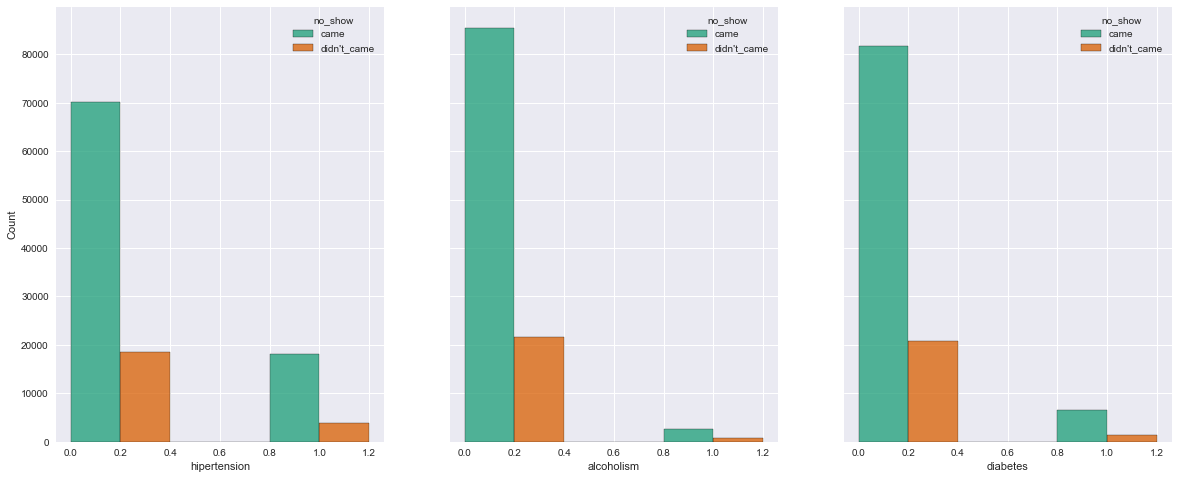

In [20]:
# grouping disease with no_show column by seaborn
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.histplot(data=df, x = 'hipertension' , hue = 'no_show' , multiple='dodge', palette = 'Dark2', binwidth=0.4, ax= ax1);
sns.histplot(data=df, x = 'alcoholism', hue = 'no_show', multiple='dodge', palette = 'Dark2',binwidth=0.4, ax= ax2);
sns.histplot(data=df, x = 'diabetes', hue = 'no_show', multiple='dodge', palette = 'Dark2', binwidth=0.4, ax = ax3);
fig.set()
fig.set_figwidth(20)
fig.set_figheight(8)


people who had hipertension is most common ill in no_show

### Research Question 2  (what is the most no show age?)

In [21]:
# percentage of every AgeGroup came or not 
df.groupby(['AgeGroup'])['no_show'].value_counts(normalize=True)

AgeGroup  no_show    
Adult     came           0.802572
          didn't_came    0.197428
Child     came           0.785525
          didn't_came    0.214475
Senior    came           0.844952
          didn't_came    0.155048
Youth     came           0.748574
          didn't_came    0.251426
Name: no_show, dtype: float64

In [22]:
# check if 0 ages are babies and came or not 

age_filter = groupby('age', 'no_show').value_counts()[0]

print('is 0 ages came to doctor ? \n', age_filter)

is 0 ages came to doctor ? 
 no_show
came           2900
didn't_came     639
Name: no_show, dtype: int64


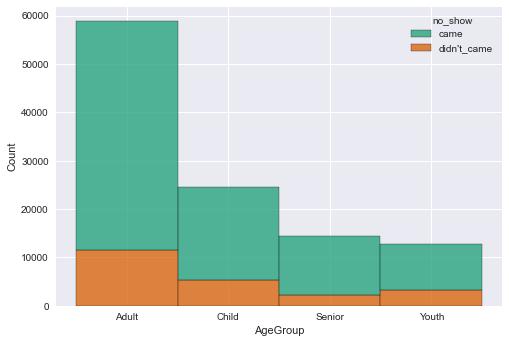

In [23]:
# groupby age group with seaborn
sns.histplot(data=df, x = 'AgeGroup', hue = 'no_show', multiple='stack', palette = 'Dark2' );

the seniors who had more than 65 years old had a best attendance , less no-show 

youth who had from 15 to 24 ages are the most no_show peopols

### Research Question 3  (no-show about sms recived?)

sms_received         no_show    
didn't recieive sms  came           0.832967
                     didn't_came    0.167033
received sms         came           0.724255
                     didn't_came    0.275745
Name: no_show, dtype: float64

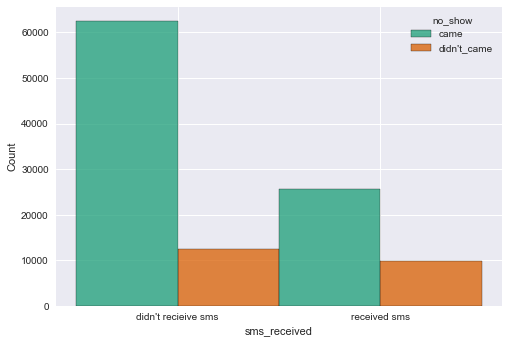

In [24]:
# groupby sms with no_show 
sns.histplot(data=df, x = 'sms_received', hue = 'no_show', multiple='dodge', palette = 'Dark2',binwidth=0.4 );
groupby('sms_received', 'no_show').value_counts(normalize=True) 


peoples who recived sms didn't attend more than peaople who didn't reicived sms 

### Research Question 4  (men or women better on attendance ? )

In [25]:
groupby('gender', 'no_show').value_counts()

gender  no_show    
F       came           57246
        didn't_came    14594
M       came           30962
        didn't_came     7725
Name: no_show, dtype: int64

gender
F    71840
M    38687
Name: patientid, dtype: int64

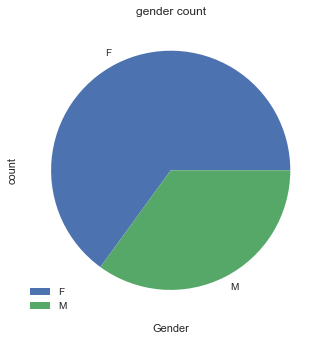

In [28]:
groupby('gender', 'patientid').count().plot(kind='pie')
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('gender count')
plt.legend()
groupby('gender', 'patientid').count()

number females in the data more than males two times


<a id='conclusions'></a>
## Conclusions

<html>
    <body>
        <ul>
         <li>ther's no nun values</li>
         <li>ther's one fault in age column person have a -1 yars old</li>
         <li>(0) ages is a real people/babies and they attend the metting  </li>        
         <li>sms didn't affect the attendance</li>
         <li>there's no relationship between specific gender and no_show</li>
        </ul>   
    </body>
</html>

### limitations
<li>the data missed appintment time (date , hour , day)  ,wich dosn't allow for knowing if the 'duration' of waiting affect on no_show or not </li>
